<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import math
%matplotlib inline

X,Y = load_iris(return_X_y=True)

In [94]:
class K_Means():
    def __init__(self,k=1,iterations = 100,elbow=False,k_max=10):
        self.k = k
        self.iterations = iterations
        self.elbow_flag = elbow
        self.k_max = k_max
        self.best_k = None
        self.elbow_reductions = None
        self.k_centroids = None
        self.y = None
        self.variances = None

    def final_centroids(self):
        return np.array(self.k_centroids)

    def get_variance(self,X,y,k_centroids):
        # sum of squares of distances between points and their centroids
        temp = 0
        for j in range(len(k_centroids)):
            for point,cluster in zip(X,y):
                if cluster == j:
                    temp += self.euclidean_distance(point,k_centroids[j])**2 
        return math.sqrt(temp)

    def euclidean_distance(self, p1, p2):
        # math.dist can gives distance between points of any dimensionality 
        # Unfortunately Colab works on python3.6 and dist is in 3.8
        #return math.dist(p1,p2)     
        return np.linalg.norm(p1-p2)

    def get_centroids(self,X,y,k):
        k_centroids = []
        cluster_indexes = []
        for j in range(k):
            cluster_indexes.append([i for i in range(len(y)) if y[i] == j])
        # Finding means of all the clusters
        # Summing all the coordinates in all the dimensions having same cluster 
        # label and taking a mean
        for cluster in cluster_indexes:
            cluster_mean = 0
            for i in cluster:
                 cluster_mean += X[i]
            num = len(cluster) if len(cluster) >0 else 1
            k_centroids.append(np.array(cluster_mean/num))
            
            # k = number of clusters and their labels as well.
            # Taking mean of all the points having same cluster label 
            # To get the mean coordinates find the mean of all the dimensional coordinates
            # E.g -> [x,y,z] otherwise mean will be a number and for distance dims must be equal
            # experession below will give direct mean instead of coordinates.
        # k_centroids.append((np.mean([point for point,cluster in zip(X,y) if cluster == j])))
        return k_centroids

    def get_cluster(self,X,k_centroids):
        y = np.zeros(len(X),dtype=int)
        min_dist = None
        cluster = 0
        dist = None
        for i in range(len(X)):
            
            min_dist = self.euclidean_distance(X[i],k_centroids[0])
            cluster = 0
            for j in range(len(k_centroids)):
                dist = self.euclidean_distance(X[i],k_centroids[j])
                if dist < min_dist:
                    min_dist = dist
                    cluster = j
            y[i] = int(cluster)
        return y

    def clustering(self,X, k):
        min_variance = None
        variance = None
        best_centroids = None
        for i in range(self.iterations):
            y = np.zeros(len(X),dtype=int)
            k_centroids = []
            variance = []

            # intializes distinct random k points from dataset
            while True:
                rand_points = np.random.randint(len(X),size=(k))
                if len(set(rand_points)) == len(rand_points):
                    break
            for points in rand_points:
                k_centroids.append(X[points])

            check_count = 0
            # Clustering Loop
            while True:
                check_count += 1
                # Prevents the loop from going to infinity in any possible case
                
                if check_count > len(X)*10:
                    raise Exception("Error in Cluster Loop. Infite Looping. Run again.") 
                
                # cluster labeling with given centroids
                y = self.get_cluster(X,k_centroids) 
                min_variance = self.get_variance(X,y,k_centroids)
                
                # Generates new centroids by taking mean of all labels
                new_centroids = self.get_centroids(X,y,k)
                
                if np.array_equal(k_centroids,new_centroids):
                    variance = self.get_variance(X,y,new_centroids)
                    k_centroids = new_centroids
                    break
                else:
                    k_centroids = new_centroids

            if variance < min_variance:
                min_variance = variance
                best_centroids = k_centroids
        return best_centroids,min_variance

    def elbow_clustering(self,X):
        var_reductions = np.zeros(self.k_max+1)
        variance = None
        variances = []
        for i in range(1,int(self.k_max+1)):
            _, variance = self.clustering(X,i)
            variances.append(variance)
        for i in range(len(variances)-1):
            var_reductions[i+1] = abs(variances[i+1]-variances[i])
        self.elbow_reductions = var_reductions
        self.variances = variances
        return var_reductions

    def fit(self, X):
        best_k = None
        k = self.k
        centroids = []
        if self.elbow_flag:

            #Gives variances for all the values of K
            #implement automation later
            self.elbow_clustering(X)

        else:
            self.k_centroids, min_var = self.clustering(X,k) #final centroids are stored globally
            self.y = self.get_cluster(X, self.k_centroids)
            return self.y
            


In [ ]:
clf = K_Means(3)
y_pred = clf.fit(X)

In [86]:
k_centroids = clf.final_centroids()

In [84]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [87]:
df = pd.DataFrame(X)

In [105]:
k_centroids

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

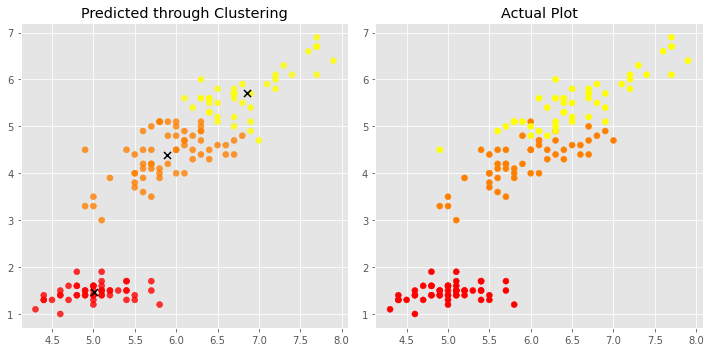

In [127]:
plt.style.use('ggplot')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axes[0].scatter(df[0],df[2],c=y_pred,cmap='autumn',alpha=.8)
axes[1].scatter(df[0],df[2],c=Y,cmap='autumn')
marker = axes[0].scatter(k_centroids[0][0],k_centroids[0][2],marker="x",color="black",s=50)
axes[0].scatter(k_centroids[1][0],k_centroids[1][2],marker="x",color="black",s=50)
axes[0].scatter(k_centroids[2][0],k_centroids[2][2],marker="x",color="black",s=50)
axes[0].title.set_text("Predicted through Clustering")
axes[1].title.set_text("Actual Plot")
fig.tight_layout()

In [97]:
clf_elb = K_Means(elbow=True,k_max=5)
clf_elb.fit(X)

In [106]:
reductions = clf_elb.elbow_reductions
variances = clf_elb.variances

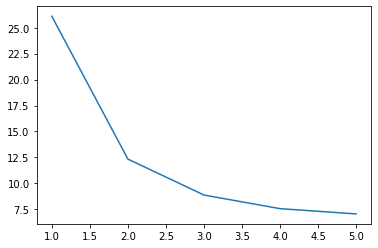

In [111]:
plt.plot(range(1,len(variances)+1),variances)